**Homework 4: Graph Spectra**

In this homework, the task is to implement, and test the spectral graph clustering algorithm described in the paper "On Spectral Clustering: Analysis and an algorithm"Links to an external site. by Andrew Y. Ng, Michael I. Jordan, and Yair Weiss. The K-eigenvector algorithm implementatztion is used to analyze two sample graphs.

+ A real graph "example1.dat Download example1.dat" -- This data set was prepared by Ron Burt. He dug out the 1966 data collected by Coleman, Katz, and Menzel on medical innovation. They collected data from physicians in four towns in Illinois: Peoria, Bloomington, Quincy, and Galesburg.

+ A synthetic graph "example2.dat

In [ ]:
# Import necessary libraries
import pandas as pd
from itertools import chain, combinations
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter
import statistics
import math

import numpy as np
import networkx as nx
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy.linalg as la

# Load and Understand Data

In [ ]:
# Combine CoLab with my google drive (file path)

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/DataMining Course 2023/Homework 4"

  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)

  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/Colab Notebooks/DataMining Course 2023/Homework 4  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Colab Notebooks/DataMining Course 2023/Homework 4
/content/gdrive/My Drive/Colab Notebooks/DataMining Course 2023/Homework 4


In [ ]:
# Get the current working directory
current_directory = os.getcwd()

# Construct the file path
file_path_example1 = os.path.join(current_directory, 'example1.dat')
print (file_path_example1)

# Construct the file path
file_path_example2 = os.path.join(current_directory, 'example2.dat')
print (file_path_example2)

/content/gdrive/My Drive/Colab Notebooks/DataMining Course 2023/Homework 4/example1.dat
/content/gdrive/My Drive/Colab Notebooks/DataMining Course 2023/Homework 4/example2.dat


In [ ]:
# Open the file and read the lines into a list
with open(file_path_example1, 'r') as file:
    lines = file.readlines()

# Process the lines to create a list of edges
list_of_edges_example1 = [tuple(map(int, line.strip().split(','))) for line in lines]

# Display the resulting list of edges
print("List of Edges Example 1:")
print(list_of_edges_example1)

List of Edges Example 1:
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (8, 9), (8, 10), (8, 5), (8, 11), (8, 12), (13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (13, 19), (20, 21), (20, 22), (20, 23), (20, 24), (20, 25), (26, 27), (26, 28), (26, 29), (26, 30), (26, 31), (26, 32), (26, 33), (34, 15), (34, 16), (34, 35), (34, 23), (21, 36), (21, 37), (21, 38), (21, 23), (21, 25), (2, 39), (2, 40), (2, 10), (2, 41), (2, 11), (2, 42), (43, 13), (43, 44), (43, 45), (43, 36), (43, 15), (43, 46), (43, 47), (43, 11), (48, 26), (48, 29), (48, 31), (48, 49), (48, 50), (48, 51), (48, 52), (9, 40), (9, 53), (9, 10), (9, 3), (27, 26), (27, 16), (27, 54), (27, 46), (27, 55), (27, 25), (56, 14), (56, 18), (56, 57), (56, 58), (59, 13), (59, 15), (59, 60), (59, 4), (59, 61), (62, 26), (62, 15), (62, 63), (62, 64), (65, 13), (65, 15), (65, 18), (65, 11), (66, 9), (66, 40), (66, 67), (66, 12), (68, 53), (68, 57), (68, 41), (68, 69), (68, 70), (71, 40), (71, 54), (71, 28), (71, 72), (71, 73), (14, 1

In [ ]:
# Open the file and read the lines into a list
with open(file_path_example2, 'r') as file:
    lines = file.readlines()

# Process the lines to create a list of edges
list_of_edges_example2 = [tuple(map(int, line.strip().split(','))) for line in lines]

# Display the resulting list of edges
print("List of Edges Example 2:")
print(list_of_edges_example2)

List of Edges Example 2:
[(2, 1, 1), (9, 1, 1), (12, 1, 1), (18, 1, 1), (20, 1, 1), (21, 1, 1), (24, 1, 1), (26, 1, 1), (31, 1, 1), (36, 1, 1), (39, 1, 1), (43, 1, 1), (44, 1, 1), (50, 1, 1), (57, 1, 1), (61, 1, 1), (63, 1, 1), (66, 1, 1), (75, 1, 1), (82, 1, 1), (84, 1, 1), (93, 1, 1), (94, 1, 1), (1, 2, 1), (4, 2, 1), (5, 2, 1), (8, 2, 1), (13, 2, 1), (23, 2, 1), (24, 2, 1), (31, 2, 1), (36, 2, 1), (37, 2, 1), (65, 2, 1), (66, 2, 1), (71, 2, 1), (82, 2, 1), (84, 2, 1), (85, 2, 1), (88, 2, 1), (4, 3, 1), (6, 3, 1), (7, 3, 1), (11, 3, 1), (14, 3, 1), (16, 3, 1), (27, 3, 1), (32, 3, 1), (33, 3, 1), (34, 3, 1), (35, 3, 1), (36, 3, 1), (38, 3, 1), (46, 3, 1), (54, 3, 1), (58, 3, 1), (60, 3, 1), (68, 3, 1), (81, 3, 1), (89, 3, 1), (91, 3, 1), (92, 3, 1), (97, 3, 1), (98, 3, 1), (99, 3, 1), (100, 3, 1), (2, 4, 1), (3, 4, 1), (12, 4, 1), (15, 4, 1), (18, 4, 1), (23, 4, 1), (25, 4, 1), (26, 4, 1), (27, 4, 1), (57, 4, 1), (65, 4, 1), (66, 4, 1), (71, 4, 1), (73, 4, 1), (75, 4, 1), (79, 4, 1), 

# Warmup Task

+ **Estimate number of clusters:**
  + Identify the Fiedler Vector, corresponding to the second smallest eigenvalue. The Fiedler vector provides a one-dimensional representation of the graph that can be used for clustering.
  + Calculate the optimum K value by analyzing the eigenvalue spectrum, considering the biggest differences between two consecutive eigenvalues (plot elbow).
  + Plot sorted (Fiedler Vector)

In [122]:
import networkx as nx
import numpy as np

def get_affinity_matrix(set_list, sigma=1.0):
    # Create an empty graph
    graph = nx.Graph()

    # Add edges from the list of sets
    for node_set in set_list:
        graph.add_edges_from([(u, v) for u in node_set for v in node_set if u != v])

    # Get the nodes and sort them to get consistent ordering
    nodes = sorted(list(graph.nodes()))

    # Calculate pairwise Euclidean distances between nodes
    positions = nx.spring_layout(graph)  # You may use other layout algorithms as well
    pos_array = np.array([positions[node] for node in sorted(graph.nodes())])
    pairwise_distances = np.sqrt(np.sum((pos_array[:, np.newaxis, :] - pos_array[np.newaxis, :, :])**2, axis=2))

    # Compute the affinity matrix using the Gaussian kernel
    affinity_matrix = np.exp(-pairwise_distances**2 / (2 * sigma**2))

    return affinity_matrix


In [123]:
# Create the affinity matrix
affinity_matrix_example1 = get_affinity_matrix(list_of_edges_example1)
affinity_matrix_example2 = get_affinity_matrix(list_of_edges_example2)

Text(0, 0.5, 'Node Index')

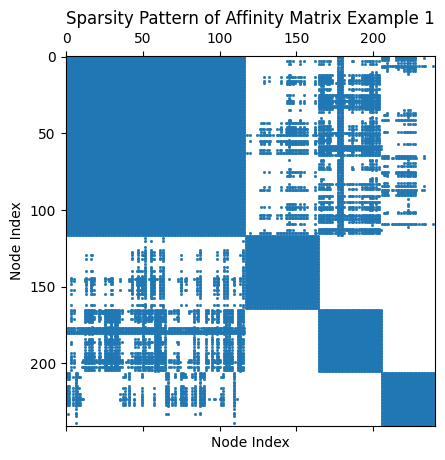

In [124]:
# Apply threshold to create a binary matrix indicating non-zero elements
binary_matrix = np.abs(affinity_matrix_example1) > 0.7
# Plot the sparsity pattern
plt.spy(binary_matrix, markersize=1)
plt.title('Sparsity Pattern of Affinity Matrix Example 1')
plt.xlabel('Node Index')
plt.ylabel('Node Index')

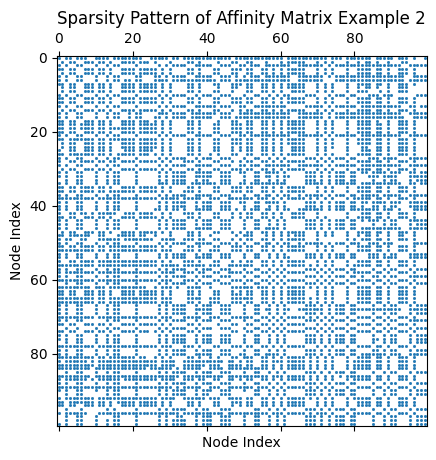

In [125]:
# Apply threshold to create a binary matrix indicating non-zero elements
binary_matrix = np.abs(affinity_matrix_example2) > 0.7
# Plot the sparsity pattern
plt.spy(binary_matrix, markersize=1)
plt.title('Sparsity Pattern of Affinity Matrix Example 2')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.show()

In [ ]:
import numpy as np

def normalized_laplacian_matrix(A):
    """
    Compute the normalized Laplacian matrix.

    Parameters:
    A (numpy.ndarray): Affinity matrix.

    Returns:
    L_normalized (numpy.ndarray): Normalized Laplacian matrix.
    """
    # Calculate diagonal matrix D
    D = np.diag(np.sum(A, axis=1))

    # Calculate inverse square root of D
    D_inv_sqrt = np.linalg.inv(np.sqrt(D))

    # Compute normalized Laplacian matrix
    L_normalized = np.identity(len(A)) - D_inv_sqrt @ A @ D_inv_sqrt

    return L_normalized


In [ ]:
# Example Compute the Laplacian matrix
laplacian_matrix_example1 = normalized_laplacian_matrix(affinity_matrix_example1)

# Print the Laplacian matrix
print("\nLaplacian Matrix:")
for row in laplacian_matrix_example1:
    print(row)

Streaming output truncated to the last 5000 lines.
 -0.00340089 -0.00349299 -0.0035306  -0.00339456 -0.00334129 -0.0034278
 -0.00345248 -0.00385132 -0.00386699 -0.00355856 -0.00366652 -0.00371552
 -0.00387181 -0.0033757  -0.0035764  -0.00349806 -0.00343673 -0.00344845
 -0.00350451 -0.00352205 -0.00344816 -0.00337398 -0.00353826 -0.00355541
 -0.00376327 -0.00382566 -0.00387963 -0.00379578 -0.00383578 -0.00394472
 -0.00347271 -0.00332513 -0.00366496 -0.00345424 -0.00343999 -0.00330913
 -0.00356232 -0.00349755 -0.00341141 -0.00313711 -0.00367052 -0.00360941
 -0.0035909  -0.00362704 -0.00357507 -0.0039075  -0.00327161 -0.00332666
 -0.00319507 -0.0032208  -0.00345072 -0.00316458 -0.00338296 -0.00394952
 -0.00396156 -0.00378505 -0.00375679 -0.00403177 -0.00372532 -0.00388763
 -0.00366198 -0.00352925 -0.0036646  -0.00351679 -0.00379882 -0.00375006
 -0.00361626 -0.00366284 -0.00361742 -0.00368879 -0.00385094 -0.003523
 -0.00386561 -0.00355441 -0.00352008 -0.00405611 -0.00378765 -0.00381932
 -0

In [ ]:
# Example Compute the Laplacian matrix
laplacian_matrix_example2 = normalized_laplacian_matrix(affinity_matrix_example2)

# Print the Laplacian matrix
print("\nLaplacian Matrix:")
for row in laplacian_matrix_example2:
    print(row)


Laplacian Matrix:
[ 0.98735232 -0.00846976 -0.01223079 -0.01018111 -0.00914662 -0.01209393
 -0.01243633 -0.0087702  -0.00923728 -0.00882022 -0.01106813 -0.01052158
 -0.01007112 -0.01147182 -0.0098168  -0.01210636 -0.01239159 -0.01056837
 -0.01122114 -0.01016056 -0.00946525 -0.01210861 -0.0106247  -0.00951117
 -0.00930919 -0.00991815 -0.0114771  -0.0107553  -0.01137684 -0.01198415
 -0.0096608  -0.01159698 -0.01101519 -0.0092164  -0.01201598 -0.01046412
 -0.01069481 -0.0114555  -0.01211422 -0.01175775 -0.0110863  -0.01171688
 -0.01102535 -0.01034022 -0.01038623 -0.01035188 -0.01164125 -0.00890276
 -0.01210165 -0.01240981 -0.01152629 -0.01077524 -0.01153335 -0.01061144
 -0.01122619 -0.01142169 -0.01217973 -0.01061757 -0.01181283 -0.01079147
 -0.01131714 -0.00925493 -0.01160342 -0.01045138 -0.01063509 -0.01201009
 -0.01154804 -0.0094508  -0.01166544 -0.00979158 -0.0118909  -0.01048316
 -0.01118324 -0.00818843 -0.01090118 -0.0106661  -0.01007879 -0.00879503
 -0.01100997 -0.01006575 -0.0115

In [ ]:
import numpy as np
def eigenvalue_computation(L):
    """
    Compute and return the sorted eigenvalues and corresponding eigenvectors
    of the Laplacian matrix in ascending order.

    Compute and return the Fiedler vector associated with the second smallest eigenvalue.

    Parameters:
    L (numpy.ndarray): Laplacian matrix.

    Returns:
    fiedler_vector (numpy.ndarray): Fiedler vector.
    """
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(L)

    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Extract the Fiedler vector (second smallest eigenvector)
    fiedler_vector = sorted_eigenvectors[:, 1]  # Assumes 0-based indexing

    return sorted_eigenvalues, sorted_eigenvectors, fiedler_vector

In [ ]:
sorted_eigenvalues1, sorted_eigenvectors1,fiedler_vector1= eigenvalue_computation(laplacian_matrix_example1)
sorted_eigenvalues2, sorted_eigenvectors2,fiedler_vector2= eigenvalue_computation(laplacian_matrix_example2)

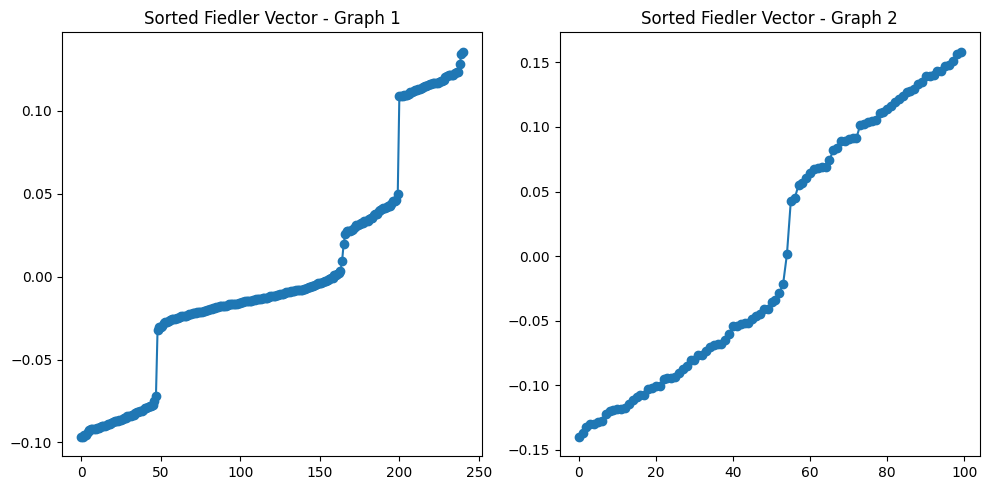

In [ ]:
# Plot sorted Fiedler vectors
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.sort(fiedler_vector1), marker='o')
plt.title('Sorted Fiedler Vector - Graph 1')

plt.subplot(1, 2, 2)
plt.plot(np.sort(fiedler_vector2), marker='o')
plt.title('Sorted Fiedler Vector - Graph 2')

plt.tight_layout()

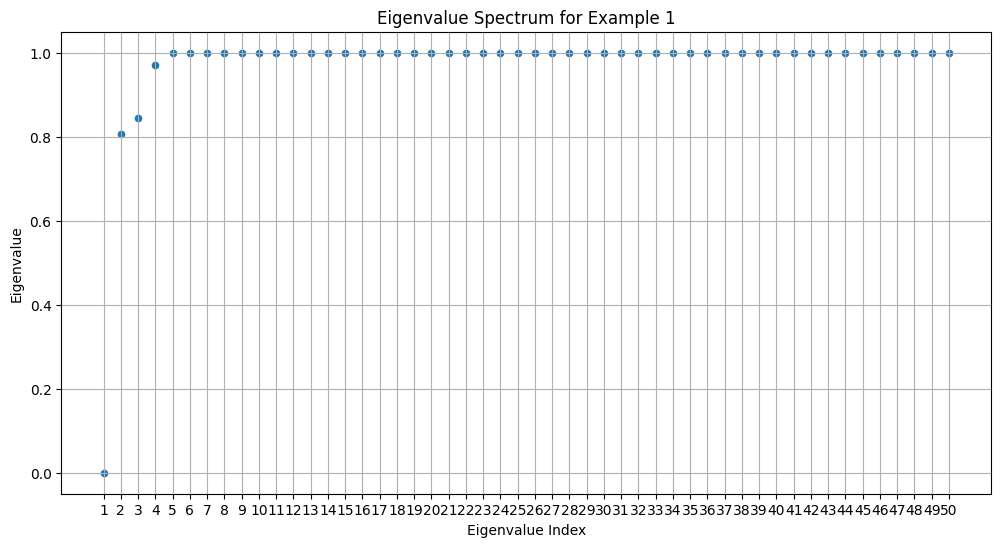

In [ ]:
# PLOT eigenvalues
import matplotlib.pyplot as plt

# Set the number of eigenvalues you want to plot
num_eigenvalues_to_plot = 50
x_number_list = np.arange(1, num_eigenvalues_to_plot + 1)
y_number_list = sorted_eigenvalues1[:num_eigenvalues_to_plot]

# Plot eigenvalue spectrum with grid and fine steps on the x-axis
plt.figure(figsize=(12, 6))
plt.scatter(x_number_list, y_number_list, s=20)
plt.title('Eigenvalue Spectrum for Example 1')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, num_eigenvalues_to_plot + 1, 1))  # Set fine steps on the x-axis
plt.grid(True)
plt.show()

Optimal K: 2


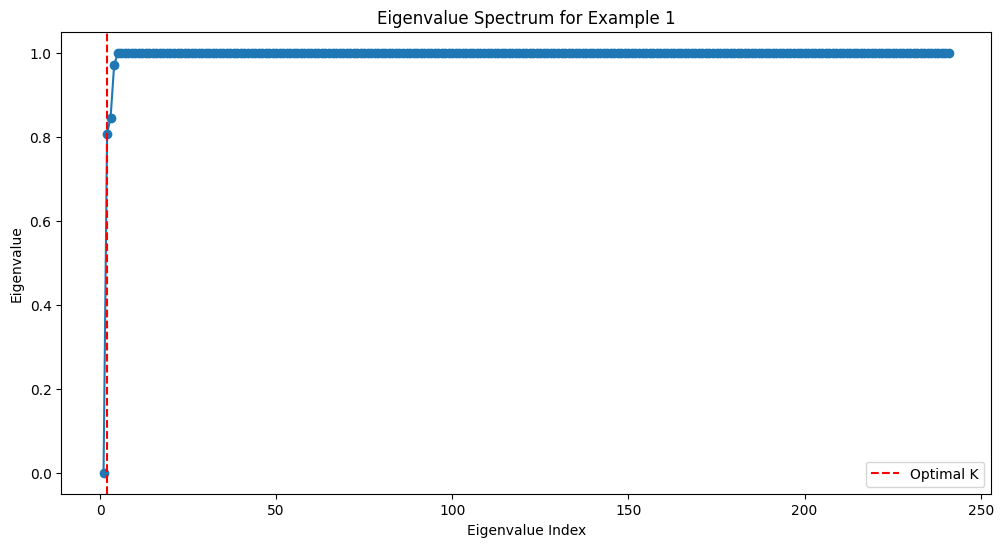

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_optimal_k(eigenvalues):
    """
    Calculate the optimal K value by analyzing the eigenvalue spectrum.

    Parameters:
    eigenvalues (numpy.ndarray): Eigenvalues sorted in ascending order.

    Returns:
    optimal_k (int): Optimal K value.
    """
    differences = np.diff(eigenvalues)
    max_diff_index = np.argmax(differences)
    optimal_k = max_diff_index + 2  # Add 1 due to 0-based indexing
    return optimal_k

def plot_eigenvalue_spectrum(eigenvalues):
    """
    Plot the eigenvalue spectrum and mark the optimal K with an elbow.

    Parameters:
    eigenvalues (numpy.ndarray): Eigenvalues sorted in ascending order.
    """
    differences = np.diff(eigenvalues)
    plt.figure(figsize=(12, 6))  # Adjust figure size
    plt.plot(np.arange(1, len(eigenvalues) + 1, 1), eigenvalues, marker='o')  # Increased resolution
    plt.title('Eigenvalue Spectrum for Example 1')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue')
    plt.axvline(x=calculate_optimal_k(eigenvalues), color='r', linestyle='--', label='Optimal K')
    plt.legend()
    plt.show()

# Example usage:

# Calculate optimal K and plot eigenvalue spectrum
optimal_k = calculate_optimal_k(sorted_eigenvalues1)
print("Optimal K:", optimal_k)

plot_eigenvalue_spectrum(sorted_eigenvalues1)


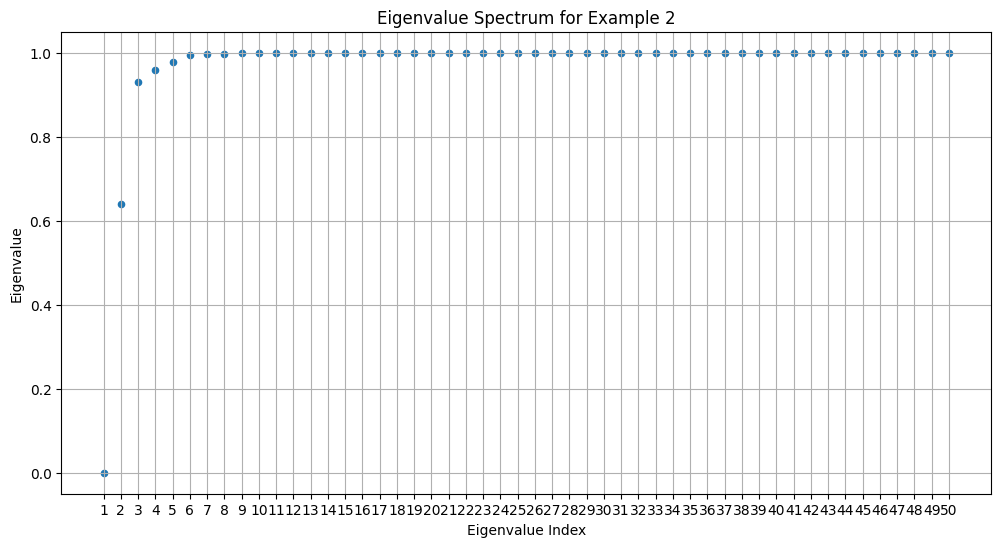

In [ ]:
# Set the number of eigenvalues you want to plot
num_eigenvalues_to_plot = 50
x_number_list = np.arange(1, num_eigenvalues_to_plot + 1)
y_number_list = sorted_eigenvalues2[:num_eigenvalues_to_plot]

# Plot eigenvalue spectrum with grid and fine steps on the x-axis
plt.figure(figsize=(12, 6))
plt.scatter(x_number_list, y_number_list, s=20)
plt.title('Eigenvalue Spectrum for Example 2')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, num_eigenvalues_to_plot + 1, 1))  # Set fine steps on the x-axis
plt.grid(True)
plt.show()

Optimal K: 2


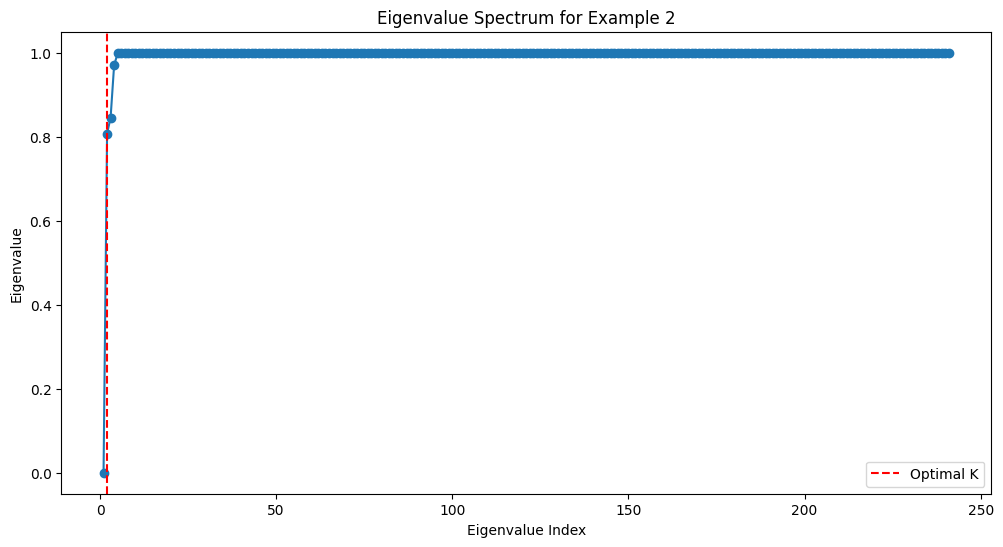

In [ ]:
def plot_eigenvalue_spectrum(eigenvalues):
    """
    Plot the eigenvalue spectrum and mark the optimal K with an elbow.

    Parameters:
    eigenvalues (numpy.ndarray): Eigenvalues sorted in ascending order.
    """
    differences = np.diff(eigenvalues)
    plt.figure(figsize=(12, 6))  # Adjust figure size
    plt.plot(np.arange(1, len(eigenvalues) + 1, 1), eigenvalues, marker='o')  # Increased resolution
    plt.title('Eigenvalue Spectrum for Example 2')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue')
    plt.axvline(x=calculate_optimal_k(eigenvalues), color='r', linestyle='--', label='Optimal K')
    plt.legend()
    plt.show()

# Example usage:

# Calculate optimal K and plot eigenvalue spectrum
optimal_k = calculate_optimal_k(sorted_eigenvalues2)
print("Optimal K:", optimal_k)

plot_eigenvalue_spectrum(sorted_eigenvalues1)


# Cluster Multiple Eigenvector, i.e., K-eigenvector Algorithm

The K-eigenvector algorithm is a spectral clustering approach that leverages multiple eigenvectors of the Laplacian matrix for clustering. It extends traditional spectral clustering, which often relies on just the first eigenvector, by considering several leading eigenvectors. This approach is particularly useful when dealing with datasets that may have complex structures or when the data is not well-separated.

Given a graph as list of edges, the objective is to cluster the graph into k-clusters using the following steps:

+ **Affinity Matrix (A):**
  + Compute the affinity matrix A, which represents the pairwise relationships between data points in the graph.
  + Common similarity measures methods include using a Gaussian kernel or k-nearest neighbors.
  + following the paper, the Gaussian kernel is adopted.

+ **Laplacian Matrix (L):**
  + Create the Diagonal Matrix (D) from the sum of each row in the affinity matrix A.
  + Compute the Laplacian Matrix (L) using L = D - A.
  + Compute the normalized Laplacian Matrix (nL).

+ **Compute Eigenvalues and Eigenvectors:**
  + Use a linear algebra library to compute the eigenvalues and eigenvectors of the normalized Laplacian matrix (nl)
  + Sort the eigenvalues in ascending order, and its correspinding egienvectors.

+ **Features Matrix_ Matrix X**:
 + reterive the estiamte K value (clusters number) from previous step
 + Choose the k largest eigenvalues of the Laplacian Matrix L, chose to be orthhognal to each other in case of repeated eigenvalues,
 + Form the feature matrix X by Stacking the selected eigenvectors into X, where each row corresponds to a data point, and each column is a feature from the eigenvectors.

+ **Features Matrix Normalization_matrix Y:**
  + Form matrix Y from X by normalizing each row to have a unit value.
  + Retrieve and normalize eigenvectors until reaching the eigengap (a significant drop in eigenvalues(eigengap).

+ **K-means Clustering:**
  + Treat each row in Y as point in the graph
  + Use a clustering algorithm (e.g., K-means) on the rows of the normalized feature matrix Y to assign each data point to a cluster.
  **Assign Clusters:**
  + Assign a point Si in the graph to j cluster if and only if row i in Y is assigned to cluster j in the previous step.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


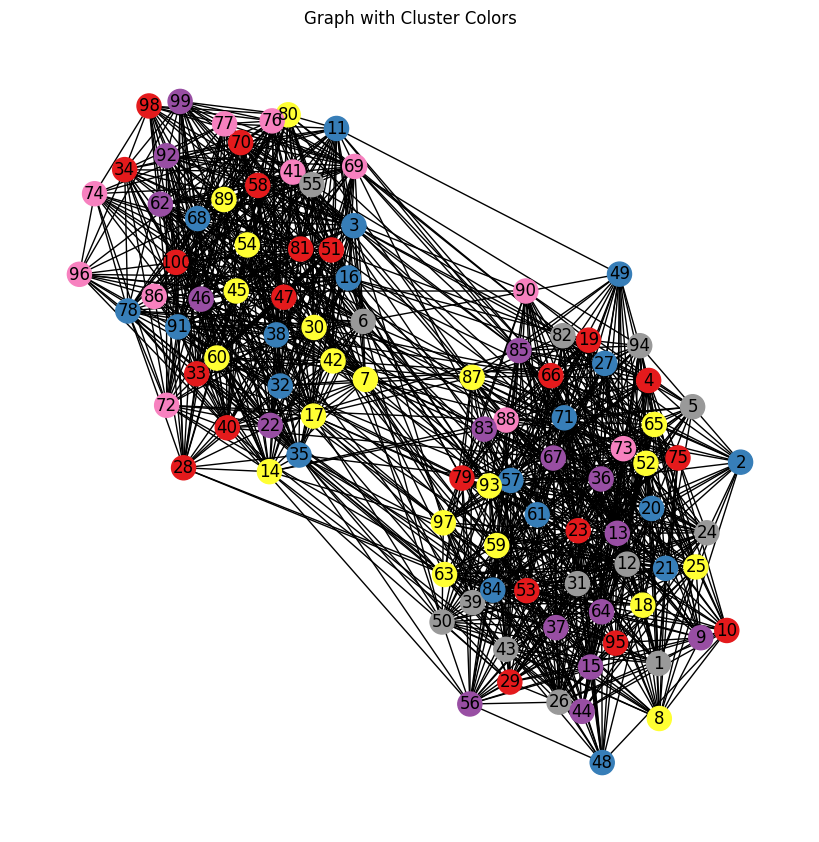

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt

def spectral_clustering(graph_edges, k):
    # Step 1: Compute Affinity Matrix (A)
    A = get_affinity_matrix(graph_edges)

    # Step 2: Compute Normalize Laplacian Matrix (L)
    L = normalized_laplacian_matrix(A)

    # Step 3: Compute Eigenvectors
    _, sorted_eigenvectors, _ = eigenvalue_computation(L)

    # Step 4: Select the first 'k' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    # Step 5: Normalize the rows of the selected eigenvectors
    normalized_eigenvectors = selected_eigenvectors / np.linalg.norm(selected_eigenvectors, axis=1)[:, np.newaxis]

    # Step 6: Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_eigenvectors)

    return cluster_labels

def assign_nodes_to_clusters(graph, cluster_labels):
    node_to_cluster = dict(zip(graph.nodes(), cluster_labels))
    return node_to_cluster

def plot_graph(graph, node_to_cluster):
    pos = nx.spring_layout(graph)  # You can use a different layout algorithm
    colors = [node_to_cluster[node] for node in graph.nodes()]

    plt.figure(figsize=(8, 8))
    nx.draw(graph, pos, node_color=colors, cmap=plt.cm.Set1, with_labels=True)
    plt.title('Graph with Cluster Colors')
    plt.show()

# Example usage:
edges_weighted = list_of_edges_example2
edges_non_weighted = list_of_edges_example1
k_weighted = 6
k_non_weighted = 4

# Perform spectral clustering for a weighted graph
cluster_labels_weighted = spectral_clustering(edges_weighted, k_weighted)

# Create a weighted graph
G_weighted = nx.Graph()
G_weighted.add_weighted_edges_from(edges_weighted)

# Assign nodes to clusters based on cluster labels
node_to_cluster_weighted = assign_nodes_to_clusters(G_weighted, cluster_labels_weighted)

# Plot the graph with cluster colors for the weighted graph
plot_graph(G_weighted, node_to_cluster_weighted)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


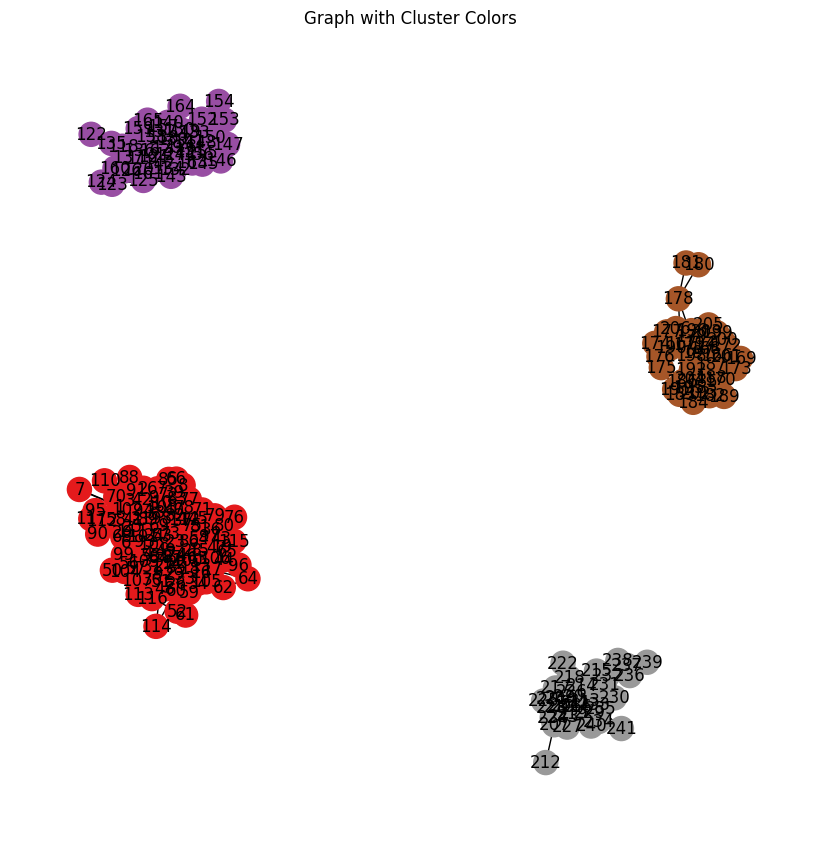

In [ ]:
# Perform spectral clustering for a non-weighted graph
cluster_labels_non_weighted = spectral_clustering(edges_non_weighted, k_non_weighted)

# Create a non-weighted graph
G_non_weighted = nx.Graph()
G_non_weighted.add_edges_from(edges_non_weighted)

# Assign nodes to clusters based on cluster labels
node_to_cluster_non_weighted = assign_nodes_to_clusters(G_non_weighted, cluster_labels_non_weighted)

# Plot the graph with cluster colors for the non-weighted graph
plot_graph(G_non_weighted, node_to_cluster_non_weighted)